<a href="https://colab.research.google.com/github/markdevine/ET5003_SEM1_2021-2/blob/main/Copy_of_ET5003_Etivity2_Mark_Devine_19187289.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div> 

#**Artificial Intelligence - MSc**
##ET5003 - MACHINE LEARNING APPLICATIONS 

###Instructor: Enrique Naredo
###ET5003_Etivity-2

In [ ]:
#@title Current Date
Today = '2021-08-22' #@param {type:"date"}


In [ ]:
#@markdown ---
#@markdown ### Enter your details here:
Student_ID = "19187289" #@param {type:"string"}
Student_full_name = "Mark Devine" #@param {type:"string"}
#@markdown ---

In [ ]:
#@title Notebook information
Notebook_type = 'Etivity' #@param ["Example", "Lab", "Practice", "Etivity", "Assignment", "Exam"]
Version = 'Draft' #@param ["Draft", "Final"] {type:"raw"}
Submission = False #@param {type:"boolean"}

# INTRODUCTION

**Piecewise regression**, extract from [Wikipedia](https://en.wikipedia.org/wiki/Segmented_regression):

Segmented regression, also known as piecewise regression or broken-stick regression, is a method in regression analysis in which the independent variable is partitioned into intervals and a separate line segment is fit to each interval. 

* Segmented regression analysis can also be performed on 
multivariate data by partitioning the various independent variables. 
* Segmented regression is useful when the independent variables, clustered into different groups, exhibit different relationships between the variables in these regions. 

* The boundaries between the segments are breakpoints.

* Segmented linear regression is segmented regression whereby the relations in the intervals are obtained by linear regression. 

***The goal is to use advanced Machine Learning methods to predict House price.***

## Imports

In [ ]:
# Suppressing Warnings:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# expand the display of the notebook when run

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm
import arviz as az
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
# to plot
import matplotlib.colors
from mpl_toolkits.mplot3d import Axes3D

# to generate classification, regression and clustering datasets
import sklearn.datasets as dt

# to create data frames
from pandas import DataFrame

# to generate data from an existing dataset
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

In [ ]:
# Define the seed so that results can be reproduced
seed = 11
rand_state = 11

# Define the color maps for plots
color_map = plt.cm.get_cmap('RdYlBu')
color_map_discrete = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","cyan","magenta","blue"])

# DATASET

Extract from this [paper](https://ieeexplore.ieee.org/document/9300074):

* House prices are a significant impression of the economy, and its value ranges are of great concerns for the clients and property dealers. 

* Housing price escalate every year that eventually reinforced the need of strategy or technique that could predict house prices in future. 

* There are certain factors that influence house prices including physical conditions, locations, number of bedrooms and others.


1. [Download the dataset](https://github.com/UL-ET5003/ET5003_SEM1_2021-2/tree/main/Week-3). 

2. Upload the dataset into your folder.



The challenge is to predict the final price of each house.

### Loading the house price dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Path, copy the path from your Drive
path = '/content/drive/MyDrive/Colab Notebooks/Data/house/'

# training, test and cost dataset file names: 
filename1 = 'house_train.csv'
train_data = path + filename1
# test dataset: 
filename2 = 'house_test.csv'
test_data = path + filename2
# cost dataset: 
filename3 = 'true_price.csv'
cost_data = path + filename3

# load the comma-separated values (csv) files into dataframes
df_train = pd.read_csv(train_data)
df_test = pd.read_csv(test_data)
df_cost = pd.read_csv(cost_data)


# test data
# df_test = pd.read_csv(test_data)
# X_test_original = df_test.drop("label",axis=1).values
# y_test = df_test.label.values
# print(X_test_original.shape)

In [ ]:
# display complete contents and information of a dataframe without any kind of truncation (https://thispointer.com/python-pandas-how-to-display-full-dataframe-i-e-print-all-rows-columns-without-truncation/)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

In [ ]:
# calculate statistics for the numerical and categorical attributes
df_train.describe()

,ad_id,bathrooms,beds,latitude,longitude,no_of_units,price,surface
count,2.982000e+03,2931.000000,2931.000000,2982.000000,2982.000000,59.000000,2.892000e+03,2431.000000
mean,1.224065e+07,1.998635,2.979188,53.355991,-6.257175,7.440678,5.323536e+05,318.851787
std,5.793037e+05,1.291875,1.468408,0.086748,0.141906,8.937081,5.678148e+05,4389.423136
min,9.968870e+05,0.000000,0.000000,51.458439,-6.521183,0.000000,1.999500e+04,3.400000
25%,1.226813e+07,1.000000,2.000000,53.298929,-6.314064,2.000000,2.800000e+05,74.100000
50%,1.237758e+07,2.000000,3.000000,53.345497,-6.252254,3.000000,3.800000e+05,100.000000
75%,1.240294e+07,3.000000,4.000000,53.388845,-6.196049,8.000000,5.750000e+05,142.000000
max,1.242836e+07,18.000000,27.000000,53.630588,-1.744995,36.000000,9.995000e+06,182108.539008


There is a distinct possibility of significant outlier in the 'max' row, let's look into this later on.

Examine the first few data rows and the last few data rows.

In [ ]:
# print the first 5 rows of the training dataframe
df_train.head(5)

,ad_id,area,bathrooms,beds,ber_classification,county,description_block,environment,facility,features,latitude,longitude,no_of_units,price,property_category,property_type,surface
0,996887,Portmarnock,NaN,NaN,NaN,Dublin,"A SELECTION OF 4 AND 5 BEDROOM FAMILY HOMES LOCATED BY THE SEA\n\r\nON VIEW BY APPOINTMENT ONLY\n\r\nBRAND NEW SHOW HOME\n\r\nStation Manor is a prestigious 'A' Rated development situated within walking distance of the historic village of Portmarnock. These generously sized, elegant 3, 4 &amp; 5 bedroom homes are ideally located just minutes from the sea front. \n\r\nSituated in a highly sought-after seaside village, Station Manor is an exclusive development of luxurious new homes, designed with exemplary attention to detail throughout, and offering all the relaxation and serenity of a small seaside town with the convenience of city living. \n\r\nFeatures\n\r\nPortmarnock is undoubtedly one of North Dublin's most picturesque locations, with clear views of Lambay Island and Ireland's Eye. Portmarnock is home to the famous 5 mile long stretch of white sandy beaches known as the 'Velvet Strand', which stretches all the way from Malahide to Sutton. Station Manor has this beautiful amenity right on its doorstep. \n\r\nThe development is within close proximity to both Portmarnock and Malahide villages, which host a wealth of amenities including excellent dining options, shops, schools and fantastic sports &amp; leisure facilities. The historic grounds of Malahide Castle &amp; Demesne are a short distance away with over 260 acres of estate parkland and gardens at your disposal, together with a children's playground and Avoca café. \n\r\nStation Manor is ideally located directly across from Portmarnock train station providing direct access to the city centre within 15-20 minutes via the DART commuter line. Portmarnock is also well-served by Dublin Bus with an excellent selection of routes (102, 32, 32X, 42, 42N (Nitelink) and 142). \n\r\nPortmarnock is a mere 10km away from Dublin International Airport, 15km from Dublin City Centre and a short distance from the pretty fishing village at Howth.Location:AMENITIES As well as the famous Velvet Strand beaches, Portmarnock village also boasts two national landmarks, the Martello Tower and the Kiosk, both on the promenade. The Outdoors The village is surrounded by golf courses on all sides, including Portmarnock Golf Club (host to a number of international professional and amateur events including the Irish Open Championships, the Walker Cup and the Irish Amateur Close Championships). There are also several active sports clubs, such as Portmarnock Tennis Club, Portmarnock A.F.C., Seaview Celtic F.C. and the Portmarnock Sport and Leisure Club. Other golf courses in the area include Malahide Golf Club, Portmarnock Golf Hotel &amp; Links (designed by Bernhard Langer) and Sutton Golf Club. With Naomh Mearnóg serving as the local Gaelic Athletic Association club, all recreational interests will be facilitated within a short distance of your home. Dining When it comes to dining out, residents of Station Manor can enjoy a vast array of the best eateries Dublin has to offer including McHughs Fine Dining, IL Panorama Lalis and the Jameson Bar at the Portmarnock Links Hotel. In nearby Malahide and Howth, household names such as Avoca, Bon Appetite and Gibneys of Malahide are situated nearby alongside a range of local cafes, bistros and bars, catering to all appetites. Shopping Portmarnock has a host of local shops bars and businesses. The Pavilions Shopping centre and Airside Retail Park are all within a short drive of Portmarnock Village  these retail centres include many world famous shopping centres, restaurants and bars. Schools There is a wide choice of local primary and secondary schools in the area which include primary schools such as  St. Marnock's National School and St. Helen's  Portmarnock Community School is the local secondary school.",prod,NaN,None,53.418216,-6.1

In [ ]:
# print the last 5 rows of the training dataframe
df_train.tail(5)

,ad_id,area,bathrooms,beds,ber_classification,county,description_block,environment,facility,features,latitude,longitude,no_of_units,price,property_category,property_type,surface
2977,12428232,Ballsbridge,2.0,2.0,C3,Dublin,"Sherry FitzGerald are delighted to present Apartment 70 The Lansdowne, Pembroke Square to the market. Pembroke Square is a magnificent apartment development built to the highest specification, located conveniently in this most sought after location minutes from Grand Canal, The IFSC and Dublin s thriving City Centre. This attractive apartment which is serviced by a lift offers the discerning buyer a comfortable pied-a-terre or a lucrative investment opportunity.\n\nPositioned on the fourth floor of this development Apartment 70 extends to 56 sq. m/603 sq. ft. (approx.) and offers well-proportioned accommodation throughout which has been finished to a very high specification and is complemented by an abundance of natural light. \n\nThe accommodation comprises a welcoming entrance hall providing built in storage. The light filled living/dining room offers access to the sunny balcony. The well-equipped kitchen is linked to the living/dining room and is fitted with integrated appliances. There are two generously proportioned double bedrooms, one with an en-suite and family bathroom completing the accommodation. it is complemented with a private balcony which is accessed of the living room and a designated car parking space. \n\nSituated in a wonderfully convenient location Pembroke Square is surrounded by a wealth of amenities such as many cafes, restaurants and theatres. Conveniently located beside Grand Canal DART station and GOOGLE, it is also within walking distance to Trinity College and many of Dublin s main commercial headquarters such as Merrion Square, St Stephen s Green, Grafton Street and the IFSC. A wide array of amenities are on the doorstep making it a perfect choice for those seeking a home of superb quality in an excellent city centre location.\n\nFurthermore, the property benefits from close proximity to Ballsbridge, Ringsend village and the Port Tunnel which provides easy access to the airport.\n\nEarly viewing is strongly recommended. \n\n\nEntrance Hall Welcoming entrance hallway with built in storage cupboard, attractive wooden style flooring.\n\nLiving / Dining Room 5.77m x 3.17m. Large open living space filled with plenty of natural light, attractive fire feature. Access to balcony. Attractive wooden style flooring.\n\nKitchen 1.84m x 2.73m. Fitted with an array of built in wall and floor level units, 4 ring Indesit hob/oven &amp; grill/extractor fan - with tiled splash-back. Built in stainless steel sink unit. Plumbed for washing machine. Integrated Bosch dishwasher.\n\nBedroom 1 4.14m x 2.59m. Bright and spacious double bedroom with built in wardrobes. Attractive wooden style flooring.\n\nBathroom 1.86m x 1.63m. Well equipped bathroom suite incorporating w.c, w.h.b, shower with over head attachment, Partly tiled walls and floor. Access to storage cupboard and hot press.\n\nBedroom 2 3.21m 2.49m. Double bedroom with enviable outlook. Built in storage cupboards. Attractive wooden style flooring.\n\nEn-Suite 2.32m x 1.53m. W.c, w.h.b, shower with over head attachment, attractive tiled walls and floor.",prod,NaN,"Prime Location\nManagement Co: Core Property Management\nService Charge: €1,750 approx.\nSpacious two bedroom fourth floor apartment on Grand Canal Street Upper\nLandscaped courtyard, roof garden\nDesignated underground car parking space\nExceptional rental opportunity\nIntercom\n",53.338738,-6.237199,NaN,415000.0,sale,apartment,56.0
2978,12428240,Rialto,1.0,3.0,B2,Dublin,"Property Team Patrick Moran is delighted to present 9 Church Avenue South to the market. This stunning three bedroom red brick contemporary residence has been refurbished to the highest standard and offers a most attractive family home in this ever-popular location. The property has the added advantage of numerous

In [ ]:
#  drop the two attributes that contain large blocks of free text as they are of no value for a predictive model
df_train.drop("description_block", axis=1, inplace=True)
df_train.drop("features", axis=1, inplace=True)

In [ ]:
# print the last 5 rows of the training dataframe
df_train.tail(5)

,ad_id,area,bathrooms,beds,ber_classification,county,environment,facility,latitude,longitude,no_of_units,price,property_category,property_type,surface
2977,12428232,Ballsbridge,2.0,2.0,C3,Dublin,prod,NaN,53.338738,-6.237199,NaN,415000.0,sale,apartment,56.0
2978,12428240,Rialto,1.0,3.0,B2,Dublin,prod,NaN,53.335793,-6.294268,NaN,485000.0,sale,terraced,101.0
2979,12428247,Smithfield,1.0,2.0,C3,Dublin,prod,Wired for Cable Television,53.346098,-6.276856,NaN,299000.0,sale,apartment,55.6
2980,12428254,Foxrock,2.0,3.0,C3,Dublin,prod,"Parking,Gas Fired Central Heating",53.273518,-6.178500,NaN,495000.0,sale,end-of-terrace,97.0
2981,12428358,Terenure,2.0,3.0,D2,Dublin,prod,NaN,53.310073,-6.325158,NaN,525000.0,sale,semi-detached,129.3


In [ ]:
# calculate the number of unique values in each column of the dataframe
nunique = df_train.nunique()
print(nunique)

ad_id                 2982
area                  156 
bathrooms             13  
beds                  15  
ber_classification    16  
county                1   
environment           1   
facility              34  
latitude              2879
longitude             2889
no_of_units           22  
price                 355 
property_category     2   
property_type         10  
surface               909 
dtype: int64


In [ ]:
# drop the columns which only have a single unique value as they are of no value to us for a predictive model
cols_to_drop = nunique[nunique == 1].index
df_train.drop(cols_to_drop, axis=1, inplace=True)

KeyError: ignored

In [ ]:
# print the last 5 rows of the training dataframe
df_train.tail(5)

,ad_id,area,bathrooms,beds,ber_classification,facility,latitude,longitude,no_of_units,price,property_category,property_type,surface
2977,12428232,Ballsbridge,2.0,2.0,C3,NaN,53.338738,-6.237199,NaN,415000.0,sale,apartment,56.0
2978,12428240,Rialto,1.0,3.0,B2,NaN,53.335793,-6.294268,NaN,485000.0,sale,terraced,101.0
2979,12428247,Smithfield,1.0,2.0,C3,Wired for Cable Television,53.346098,-6.276856,NaN,299000.0,sale,apartment,55.6
2980,12428254,Foxrock,2.0,3.0,C3,"Parking,Gas Fired Central Heating",53.273518,-6.178500,NaN,495000.0,sale,end-of-terrace,97.0
2981,12428358,Terenure,2.0,3.0,D2,NaN,53.310073,-6.325158,NaN,525000.0,sale,semi-detached,129.3


In [ ]:
# let's check the property_category values
df_train.property_category.drop_duplicates()

0     new_development_parent
59    sale                  
Name: property_category, dtype: object

In [ ]:
# drop the property_category which only has one value 'sale' sparely populated so is of no value to us for a predictive model
df_train.drop('property_category', axis=1, inplace=True)

In [ ]:
# print the last 5 rows of the training dataframe
df_train.tail(5)

,ad_id,area,bathrooms,beds,ber_classification,facility,latitude,longitude,no_of_units,price,property_type,surface
2977,12428232,Ballsbridge,2.0,2.0,C3,NaN,53.338738,-6.237199,NaN,415000.0,apartment,56.0
2978,12428240,Rialto,1.0,3.0,B2,NaN,53.335793,-6.294268,NaN,485000.0,terraced,101.0
2979,12428247,Smithfield,1.0,2.0,C3,Wired for Cable Television,53.346098,-6.276856,NaN,299000.0,apartment,55.6
2980,12428254,Foxrock,2.0,3.0,C3,"Parking,Gas Fired Central Heating",53.273518,-6.178500,NaN,495000.0,end-of-terrace,97.0
2981,12428358,Terenure,2.0,3.0,D2,NaN,53.310073,-6.325158,NaN,525000.0,semi-detached,129.3


In [ ]:
# let's check the missing values across the attributes as a percentage (https://medium.com/dunder-data/finding-the-percentage-of-missing-values-in-a-pandas-dataframe-a04fa00f84ab)
df_train.isna().mean().round(4) * 100

ad_id                 0.00 
area                  0.00 
bathrooms             1.71 
beds                  1.71 
ber_classification    22.70
facility              67.64
latitude              0.00 
longitude             0.00 
no_of_units           98.02
price                 3.02 
property_type         1.71 
surface               18.48
dtype: float64

Now let's tackle the two attributes 'facility' and 'no_of_units' that seem to contain a significant number of NaNs.

In [ ]:
# let's check the facility values
df_train.facility.drop_duplicates()

0       NaN                                                                                         
59      Parking                                                                                     
60      Parking,Gas Fired Central Heating,Wired for Cable Television                                
69      Parking,Alarm,Wired for Cable Television,Oil Fired Central Heating                          
70      Parking,Gas Fired Central Heating,Alarm                                                     
71      Parking,Gas Fired Central Heating                                                           
77      Parking,Oil Fired Central Heating                                                           
89      Parking,Gas Fired Central Heating,Wheelchair Access                                         
91      Parking,Gas Fired Central Heating,Alarm,Wired for Cable Television,Oil Fired Central Heating
92      Gas Fired Central Heating                                                          

In [ ]:
# drop the facility attribute which is mainly populated with Nans and the the remaining values are free text so it is of no value for a predictive model
df_train.drop('facility', axis=1, inplace=True)

In [ ]:
# let's check the no_of_units values
df_train.no_of_units.drop_duplicates()

0       NaN                                                                                         
59      Parking                                                                                     
60      Parking,Gas Fired Central Heating,Wired for Cable Television                                
69      Parking,Alarm,Wired for Cable Television,Oil Fired Central Heating                          
70      Parking,Gas Fired Central Heating,Alarm                                                     
71      Parking,Gas Fired Central Heating                                                           
77      Parking,Oil Fired Central Heating                                                           
89      Parking,Gas Fired Central Heating,Wheelchair Access                                         
91      Parking,Gas Fired Central Heating,Alarm,Wired for Cable Television,Oil Fired Central Heating
92      Gas Fired Central Heating                                                          

In [ ]:
# drop the no_of_units attribute which is mainly populated with Nans and the the remaining values are free text so it is of no value for a predictive model
df_train.drop('no_of_units', axis=1, inplace=True)

In [ ]:
# print the last 5 rows of the training dataframe
df_train.tail(5)

,ad_id,area,bathrooms,beds,ber_classification,latitude,longitude,price,property_type,surface
2977,12428232,Ballsbridge,2.0,2.0,C3,53.338738,-6.237199,415000.0,apartment,56.0
2978,12428240,Rialto,1.0,3.0,B2,53.335793,-6.294268,485000.0,terraced,101.0
2979,12428247,Smithfield,1.0,2.0,C3,53.346098,-6.276856,299000.0,apartment,55.6
2980,12428254,Foxrock,2.0,3.0,C3,53.273518,-6.178500,495000.0,end-of-terrace,97.0
2981,12428358,Terenure,2.0,3.0,D2,53.310073,-6.325158,525000.0,semi-detached,129.3


This is starting to looking like a much cleaner dataset that is begining to look appriopriate for the prediction of the final price of a house.

Next let's check the latitude	and longitude attributes as they would be expected to have an impact on the price of a house.

In [ ]:
plt.figure(figsize=(10,10))
sns.jointplot(x=data.lat.values, y=data.long.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()
# plt1 = plt()
sns.despine

In [ ]:
# check the number of distinct categories per attribute, that is, the cardinality:

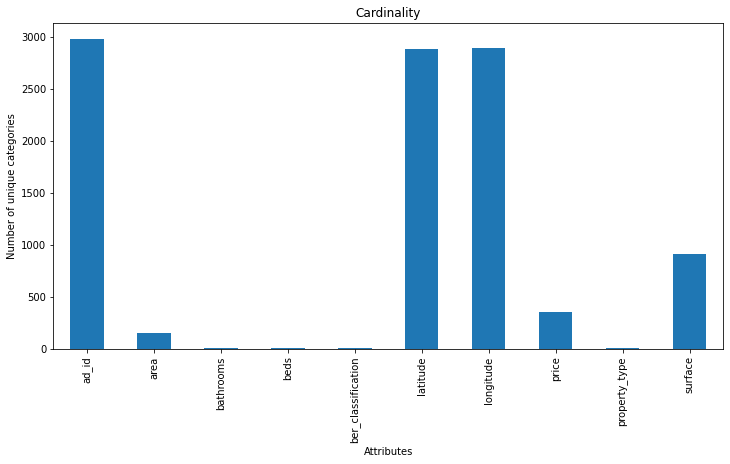

In [ ]:
# plot the cardinality of the attributes

df_train.nunique().plot.bar(figsize=(12,6))
plt.ylabel('Number of unique categories')
plt.xlabel('Attributes')
plt.title('Cardinality')
plt.show()

In [ ]:
# print the last 5 rows of the training dataframe
df_train.tail(5)

,ad_id,area,bathrooms,beds,ber_classification,county,environment,facility,latitude,longitude,no_of_units,price,property_category,property_type,surface
2977,12428232,Ballsbridge,2.0,2.0,C3,Dublin,prod,NaN,53.338738,-6.237199,NaN,415000.0,sale,apartment,56.0
2978,12428240,Rialto,1.0,3.0,B2,Dublin,prod,NaN,53.335793,-6.294268,NaN,485000.0,sale,terraced,101.0
2979,12428247,Smithfield,1.0,2.0,C3,Dublin,prod,Wired for Cable Television,53.346098,-6.276856,NaN,299000.0,sale,apartment,55.6
2980,12428254,Foxrock,2.0,3.0,C3,Dublin,prod,"Parking,Gas Fired Central Heating",53.273518,-6.178500,NaN,495000.0,sale,end-of-terrace,97.0
2981,12428358,Terenure,2.0,3.0,D2,Dublin,prod,NaN,53.310073,-6.325158,NaN,525000.0,sale,semi-detached,129.3


In [ ]:
print("The training dataframe is of shape", (df_train.shape))
print("The testing dataframe is of shape", (df_test.shape))
print("The cost dataframe is of shape", (df_cost.shape))

The training dataframe is of shape (2982, 15)
The testing dataframe is of shape (500, 16)
The cost dataframe is of shape (500, 2)


In [ ]:
# find the categorical columns with NaNs
df_train.isna().sum()

ad_id                    0
area                     0
bathrooms               51
beds                    51
ber_classification     677
county                   0
environment              0
facility              2017
latitude                 0
longitude                0
no_of_units           2923
price                   90
property_category        0
property_type           51
surface                551
dtype: int64

In [ ]:
# encode the ordinal attribute month 
# create a mapper

scale_mapper = {
    "jan": 1,
    "feb": 2,
    "mar": 3,
    "apr": 4,
    "may": 5,
    "jun": 6,
    "jul": 7,
    "aug": 8,
    "sep": 9,
    "oct": 10,
    "nov": 11,
    "dec": 12,
}

df['month'] = df['month'].replace(scale_mapper)

df.tail()

In [ ]:
# first one-hot encode the categorical columns with NaNs
df_train = pd.get_dummies(df_train, columns=['property_type', 'ber_classification'], 
                        dummy_na=True, 
                        drop_first=True)
df_train.tail()

,ad_id,area,bathrooms,beds,county,description_block,environment,facility,features,latitude,longitude,no_of_units,price,property_category,surface,property_type_bungalow,property_type_detached,property_type_duplex,property_type_end-of-terrace,property_type_semi-detached,property_type_site,property_type_studio,property_type_terraced,property_type_townhouse,property_type_nan,ber_classification_A2,ber_classification_A3,ber_classification_B1,ber_classification_B2,ber_classification_B3,ber_classification_C1,ber_classification_C2,ber_classification_C3,ber_classification_D1,ber_classification_D2,ber_classification_E1,ber_classification_E2,ber_classification_F,ber_classification_G,ber_classification_SINo666of2006exempt,ber_classification_nan
2977,12428232,Ballsbridge,2.0,2.0,Dublin,Sherry FitzGerald are delighted to present Apa...,prod,NaN,Prime Location\nManagement Co: Core Property M...,53.338738,-6.237199,NaN,415000.0,sale,56.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2978,12428240,Rialto,1.0,3.0,Dublin,Property Team Patrick Moran is delighted to pr...,prod,NaN,Totally refurbished to the highest standard. \...,53.335793,-6.294268,NaN,485000.0,sale,101.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2979,12428247,Smithfield,1.0,2.0,Dublin,Earnest estate agents are delighted to present...,prod,Wired for Cable Television,OVERLOOKING THE RIVER LIFFEY \n3RD FLOOR APART...,53.346098,-6.276856,NaN,299000.0,sale,55.6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2980,12428254,Foxrock,2.0,3.0,Dublin,Janet Carroll Estate Agents are pleased to pre...,prod,"Parking,Gas Fired Central Heating",None,53.273518,-6.178500,NaN,495000.0,sale,97.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2981,12428358,Terenure,2.0,3.0,Dublin,ON VIEW SATURDAY 7 TH MARCH 2020 11:30 AM - 12...,prod,NaN,Charming three-bedroom family home\nMinutes aw...,53.310073,-6.325158,NaN,525000.0,sale,129.3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
# now one-hot encode all other categorical columns
df_train = pd.get_dummies(df_train, drop_first=True)
df_train.tail()

,ad_id,bathrooms,beds,latitude,longitude,no_of_units,price,surface,property_type_bungalow,property_type_detached,property_type_duplex,property_type_end-of-terrace,property_type_semi-detached,property_type_site,property_type_studio,property_type_terraced,property_type_townhouse,property_type_nan,ber_classification_A2,ber_classification_A3,ber_classification_B1,ber_classification_B2,ber_classification_B3,ber_classification_C1,ber_classification_C2,ber_classification_C3,ber_classification_D1,ber_classification_D2,ber_classification_E1,ber_classification_E2,ber_classification_F,ber_classification_G,ber_classification_SINo666of2006exempt,ber_classification_nan,area_Ard Na Greine,area_Artane,area_Ashtown,area_Balbriggan,area_Baldoyle,area_Balgriffin,...,features_Wonderful 108 ft long south-west facing rear garden\nComes with full planning permission to renovate and extend the property to 217 sq.m.\nHighly desirable location in a quiet residential setting\nSelf-contained chalet which can be used for a variety of purposes\nLarge garage and outside store room\nOff street parking\nLocated within easy reach of both primary and secondary schools\nGFCH\nPhone points\nTv Points\n,"features_Wonderful 2 bedroom ground floor apartment.\nExtending to 63.5 sq.m / 684 sq.ft.\nEnviable city centre location.\n10 minute walk to the city centre.\nElectric heating.\nNo parking.\nWell serviced by transport links, including DART and Dublin Bus.\nClose to Grafton Street, Grand Canal Dock and the IFSC.\n",features_Wonderful 3 bed detached bungalow. \nAccommodation extends to approx. 81 sq.m. / 872 sq.ft\nEnjoying a premier address \nSunny Gardens to front and rear light filled house. \nTwo side entrance to rear garden\nPrivate Parking to the front\nCul de sac location\nOFCH Fully functioning alarm\nPotential to convert attic (sub to PP.) Potential to extend to the rear (sub to PP.)\n Walking distance of Bus &amp; shops at Cornelscourt Easy access to leading schools and colleges Adjacent to the QBC &amp; N11\n,"features_Wonderful 3 bedroom terraced, family home c. 101 sq mt/1,087 sq ft\nExcellent location\nWell-proportioned accommodation\nConverted Attic Room\nDouble glazing throughout\nGas Fired Central Heating\nPaved courtyard to the front with off street parking\nLarge concrete shed to the rear and access to communal courtyard\nSuperb transport facilities (Luas, DART &amp; QBC)\nClose to many excellent junior and senior schools\n",features_Wonderful 6/7 bed detached family home c.343 sqm. \nSuperbly spacious receptions \nViews of the Dublin and Wicklow Mountains \nLarge light filled accommodation \nBeautiful sunny private landscaped front and rear gardens \nPatio areas \nAmple parking to front\nPrivate enclave behind security gates \nGas Fired Central Heating \nLarge storage \n,features_Wonderful Location\nOriginal Fireplaces\nLarge Gated Driveway\nSouth Facing Aspect\nOverlooking River Liffey\n,features_Wonderful bright interiors\nElectric heating\n Double glazing throughout\n Magnificent private garden\nGarage suitable for conversion\n Surrounded by excellent schools and colleges\n,features_Wonderful location in a quiet cul de sac in the heart of Castleknock Village\nOverlooks a fantastic green to the front\nBoasting a sunny West facing landscaped rear garden\nTurnkey home presented in exemplary condition with a host of extras to include:\nHeat Recovery Ventilation System (HRV)\nUnderfloor Heating throughout ground floor\nCentral Vaccum system\nSolar Panels\nElectric under floor heat mats in bathroom &amp; En Suites upstairs\nBespoke Joinery &amp; impressive one off design staircase\n,"features_Wonderful, private rear garden\nGFCH (recently upgraded)\nOff street parking\nExtended hallway and kitchen/ dining area\nRecently converted attic with ensuite\n","features_Wonderful, private west facing rear garden\nGFCH \nOff street parking\nExtended kitchen, living and dining area €¢ \nClose to the M1, the M50 &amp; Dublin Airport\n","features_Wonderful, priv

In [ ]:
#  check for missing values after the encoding
print('Number of missing values for each attribute')
df_train.isna().sum()

Number of missing values for each attribute


ad_id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            0
bathrooms                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       51
beds                              

In [ ]:
# print statistical summary for all numerical attributes of the training dataframe
df_train.describe()

,ad_id,bathrooms,beds,latitude,longitude,no_of_units,price,surface
count,2.982000e+03,2931.000000,2931.000000,2982.000000,2982.000000,59.000000,2.892000e+03,2431.000000
mean,1.224065e+07,1.998635,2.979188,53.355991,-6.257175,7.440678,5.323536e+05,318.851787
std,5.793037e+05,1.291875,1.468408,0.086748,0.141906,8.937081,5.678148e+05,4389.423136
min,9.968870e+05,0.000000,0.000000,51.458439,-6.521183,0.000000,1.999500e+04,3.400000
25%,1.226813e+07,1.000000,2.000000,53.298929,-6.314064,2.000000,2.800000e+05,74.100000
50%,1.237758e+07,2.000000,3.000000,53.345497,-6.252254,3.000000,3.800000e+05,100.000000
75%,1.240294e+07,3.000000,4.000000,53.388845,-6.196049,8.000000,5.750000e+05,142.000000
max,1.242836e+07,18.000000,27.000000,53.630588,-1.744995,36.000000,9.995000e+06,182108.539008


In [ ]:
# Inferences we can draw by looking at the output of describe():

# Overall the dataset is not complete for the numerical attributes. 

# By comparing the mean and the median (50%) there are possible skews in the "bathrooms", "beds", "no_of_units", "price" and "surface" attributes.

# Is seems like there is a significant outlier instance which has an extreme attribute values associated with it.

## Training & Test Data

In [ ]:
# split data into training and test
from sklearn.model_selection import train_test_split

# training: 70% (0.7), test: 30% (0.3) 
# you could try any other combination 
# but consider 50% of training as the low boundary
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3)

### Train dataset

In [ ]:
# training dataset: 
training_file = syntPath+filename1
# test dataset: 
testing_file = syntPath+filename2
# cost dataset: 
cost_file = syntPath+filename3

In [ ]:
# show first data frame rows 
df_train.head()

In [ ]:
# Generate descriptive statistics
df_train.describe()

### Test dataset

In [ ]:
# show first data frame rows 
df_test.head()

,ad_id,area,bathrooms,beds,ber_classification,county,description_block,environment,facility,features,latitude,longitude,no_of_units,property_category,property_type,surface
0,12373510,Skerries,2.0,4.0,G,Dublin,"It's all in the name ""Island View"";. Truly won...",prod,"Parking,Alarm,Oil Fired Central Heating",Breath-taking panoramic views radiate from thi...,53.566881,-6.101148,NaN,sale,bungalow,142.0
1,12422623,Lucan,2.0,3.0,C1,Dublin,REA McDonald - Lucan' s longest established es...,prod,NaN,Gas fired central heating.\nDouble glazed wind...,53.362992,-6.452909,NaN,sale,terraced,114.0
2,12377408,Swords,3.0,4.0,B3,Dublin,REA Grimes are proud to present to the market ...,prod,NaN,Pristine condition throughout\nHighly sought-a...,53.454198,-6.262964,NaN,sale,semi-detached,172.0
3,12420093,Lucan,4.0,3.0,A3,Dublin,"REA McDonald, Lucan' s longest established est...",prod,NaN,A-rated home within a short walk of Lucan Vill...,53.354402,-6.458647,NaN,sale,semi-detached,132.4
4,12417338,Clondalkin,1.0,3.0,E2,Dublin,"Hibernian Auctioneers are delighted to bring, ...",prod,"Parking,Gas Fired Central Heating,Wired for Ca...",Mature Location \nGas Heating \nClose to Ameni...,53.336530,-6.393587,NaN,sale,semi-detached,88.0


In [ ]:
# Generate descriptive statistics
df_test.describe()

,ad_id,bathrooms,beds,latitude,longitude,no_of_units,surface
count,5.000000e+02,500.000000,500.000000,500.000000,500.000000,0.0,500.000000
mean,1.231695e+07,1.994000,2.930000,53.356034,-6.247842,NaN,156.007671
std,1.485832e+05,1.106532,1.191612,0.081905,0.088552,NaN,344.497362
min,1.130615e+07,0.000000,0.000000,53.221348,-6.496987,NaN,33.500000
25%,1.228617e+07,1.000000,2.000000,53.297373,-6.296404,NaN,72.375000
50%,1.237964e+07,2.000000,3.000000,53.339547,-6.243572,NaN,98.000000
75%,1.240544e+07,3.000000,4.000000,53.381650,-6.185055,NaN,138.935000
max,1.242809e+07,8.000000,7.000000,53.619775,-6.064874,NaN,5746.536120


### Expected Cost dataset

In [ ]:
# Generate descriptive statistics
df_cost.describe()

,Id,Expected
count,5.000000e+02,5.000000e+02
mean,1.231695e+07,5.810356e+05
std,1.485832e+05,6.009194e+05
min,1.130615e+07,8.500000e+04
25%,1.228617e+07,2.950000e+05
50%,1.237964e+07,4.250000e+05
75%,1.240544e+07,5.950000e+05
max,1.242809e+07,5.750000e+06


# PIECEWISE REGRESSION

## Full Model

In [ ]:
# select some features columns just for the baseline model
# assume not all of the features are informative or useful
# in this exercise you could try all of them if possible

featrain = ['feature_1','feature_2','feature_3','cost']
# dropna: remove missing values
df_subset_train = dftrain[featrain].dropna(axis=0)

featest = ['feature_1','feature_2','feature_3']
df_subset_test  =  dftest[featest].dropna(axis=0)

# cost
df_cost = df_cost[df_cost.index.isin(df_subset_test.index)]

In [ ]:
# model
with pm.Model() as model:
    #prior over the parameters of linear regression
    alpha = pm.Normal('alpha', mu=0, sigma=30)
    #we have one beta for each column of Xn
    beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn_train.shape[1])
    #prior over the variance of the noise
    sigma = pm.HalfCauchy('sigma_n', 5)
    #linear regression model in matrix form
    mu = alpha + pm.math.dot(beta, Xn_train.T)
    #likelihood, be sure that observed is a 1d vector
    like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn_train[:,0])
    

In [ ]:
# prediction
ll=np.mean(posterior['alpha']) + np.dot(np.mean(posterior['beta'],axis=0), Xn_test.T)
y_pred_BLR = np.exp(yscaler.inverse_transform(ll.reshape(-1,1)))[:,0]
print("MAE = ",(np.mean(abs(y_pred_BLR - y_test))))
print("MAPE = ",(np.mean(abs(y_pred_BLR - y_test) / y_test)))

## Clustering

### Full Model

In [ ]:
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4)


### Clusters

In [ ]:
# train clusters



In [ ]:
# test clusters


## Piecewise Model

In [ ]:
# model_0
with pm.Model() as model_0:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn0
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn0.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  #linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn0.T)
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn0[:,0])



##Simulations

### Only Cluster 0

## Overall

## Test set performance

### PPC on the Test set



# SUMMARY